<a href="https://colab.research.google.com/github/Rajagopalhertzian/telcocustomer_churn-ml_algorithms/blob/main/telcocustomer_churn_ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Read Data

In [2]:
data = pd.read_excel('/content/Telco_customer_churn.xlsx')
data.head().T

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Data Cleaning

In [4]:
data.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [5]:
data.duplicated().sum()

0

In [6]:
data['Count'].value_counts()

,count
Count,
1,7043


In [7]:
data = data.drop(columns='Count')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

In [9]:
data.Country.value_counts()

,count
Country,
United States,7043


In [10]:
data = data.drop(columns='Country')

In [11]:
data.State.value_counts()

,count
State,
California,7043


In [12]:
data = data.drop(columns='State')

In [13]:
data.head().T

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,Yes,Yes,Yes


# EDA

In [14]:
top_10_Cities = data.City.value_counts().head(10)
top_10_Cities

,count
City,
Los Angeles,305
San Diego,150
San Jose,112
Sacramento,108
San Francisco,104
Fresno,64
Long Beach,60
Oakland,52
Stockton,44


<ipython-input-15-7a8819a01efd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_Cities.index, y=top_10_Cities.values, palette='viridis')


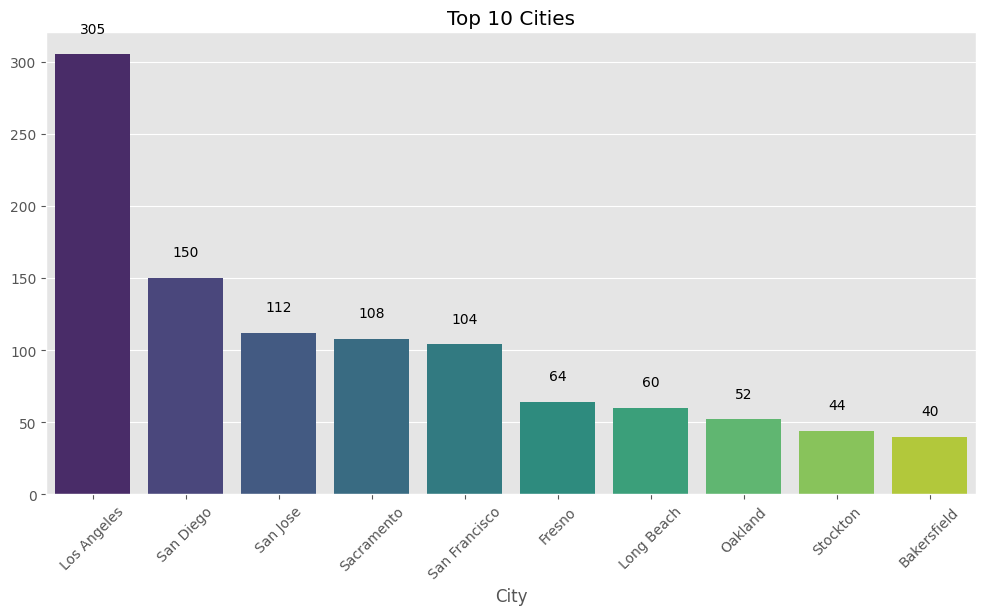

In [15]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top_10_Cities.index, y=top_10_Cities.values, palette='viridis')
plt.title('Top 10 Cities')
plt.xlabel('City')
for i, count in enumerate(top_10_Cities.values):
    plt.text(i, count + 15, str(count), ha='center')
plt.xticks(rotation=45)
plt.show()


- Top 10 Cities

In [16]:
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)
m

In [17]:
gender_count = data.Gender.value_counts()
gender_per = data.Gender.value_counts(normalize=True)*100
freq_table = pd.DataFrame({'Counts': gender_count,'Percentage %':gender_per})
freq_table

,Counts,Percentage %
Gender,,
Male,3555,50.47565
Female,3488,49.52435


- Number of Males and Femals Nearly equal

<ipython-input-18-5b7ad40e6791>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Senior Citizen'].value_counts().index, y=data['Senior Citizen'].value_counts().values, palette='viridis')


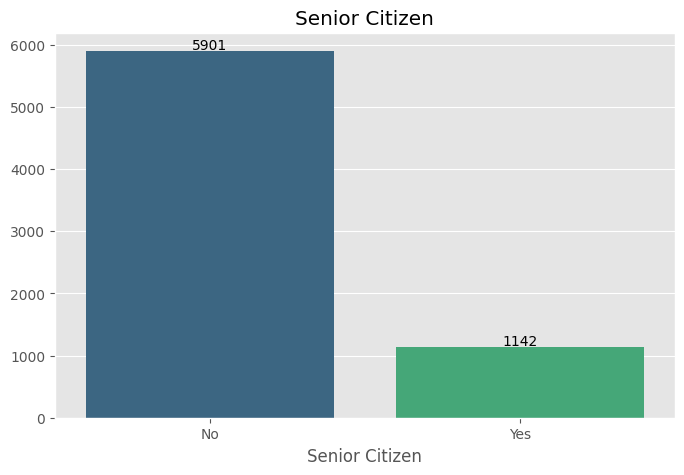

In [18]:
data['Senior Citizen'].value_counts()
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Senior Citizen'].value_counts().index, y=data['Senior Citizen'].value_counts().values, palette='viridis')
plt.title('Senior Citizen')
for i, count in enumerate(data['Senior Citizen'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Most of them not Seniors

<ipython-input-19-7cef566aa1b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Partner'].value_counts().index, y=data['Partner'].value_counts().values, palette='viridis')


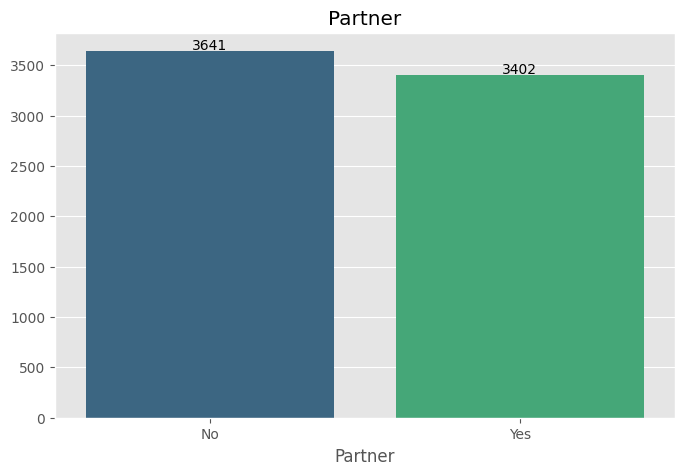

In [19]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Partner'].value_counts().index, y=data['Partner'].value_counts().values, palette='viridis')
plt.title('Partner')
for i, count in enumerate(data['Partner'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Number of Customers that have partners nearly equal to the ones who don't

<ipython-input-20-c9c1b4f1419a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Dependents'].value_counts().index, y=data['Dependents'].value_counts().values, palette='viridis')


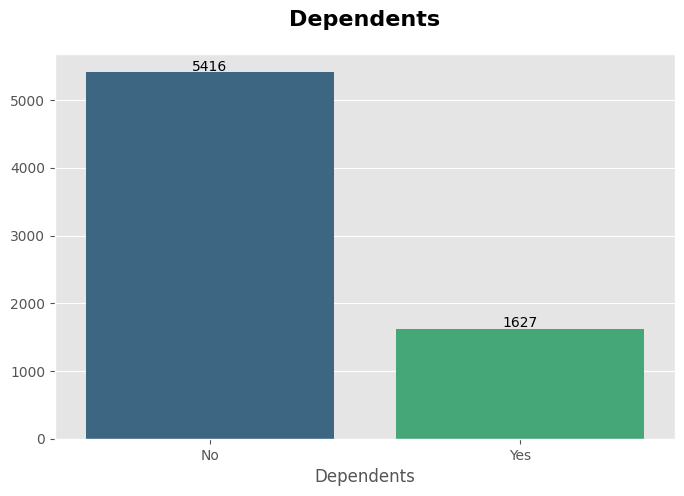

In [20]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Dependents'].value_counts().index, y=data['Dependents'].value_counts().values, palette='viridis')
plt.title('Dependents', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Dependents'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Most of the Customers got no Dependents

In [21]:
old_customer_in_years= (data['Tenure Months'].value_counts().max())/12

In [22]:
old_customer_in_years

51.083333333333336

- oldest customer in the company with 51 years with the company

<ipython-input-23-27e54545c883>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Phone Service'].value_counts().index, y=data['Phone Service'].value_counts().values, palette='viridis')


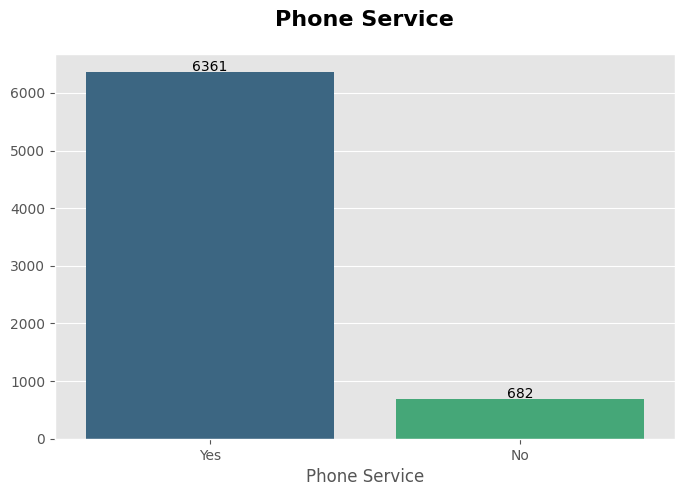

In [23]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Phone Service'].value_counts().index, y=data['Phone Service'].value_counts().values, palette='viridis')
plt.title('Phone Service', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Phone Service'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Most of the customers have phone Services

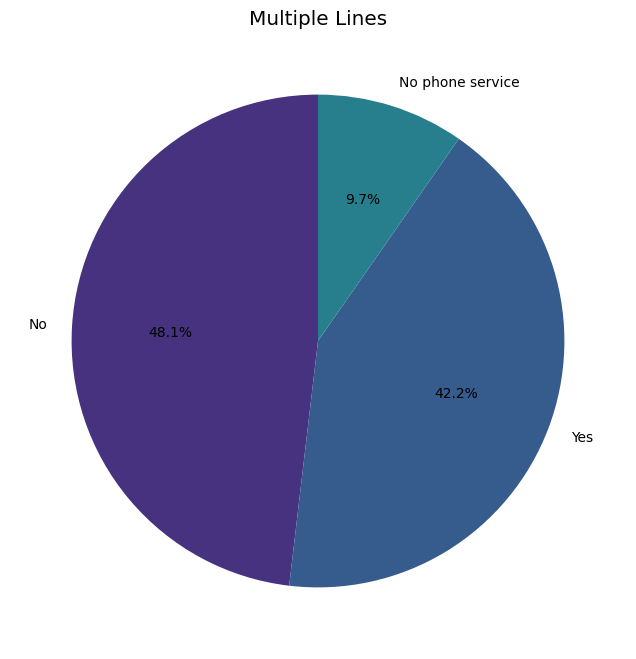

In [24]:
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
data['Multiple Lines'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Multiple Lines')
plt.ylabel('')
plt.show()


<ipython-input-25-9ee68584d891>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Internet Service'].value_counts().index, y=data['Internet Service'].value_counts().values, palette='viridis')


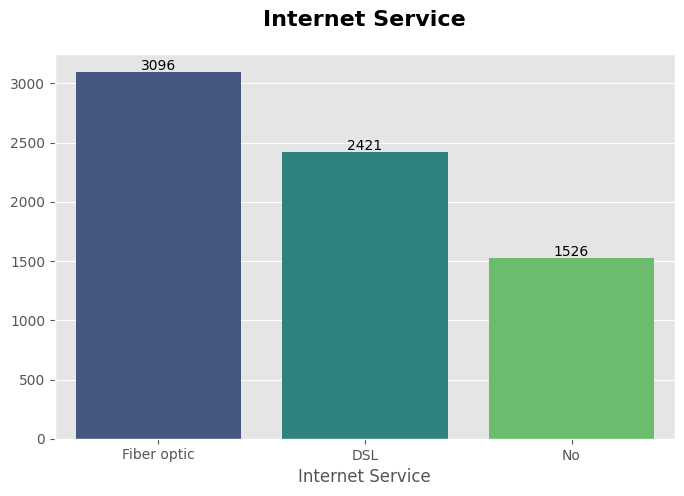

In [25]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Internet Service'].value_counts().index, y=data['Internet Service'].value_counts().values, palette='viridis')
plt.title('Internet Service', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Internet Service'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Fiber is the most internet service

<ipython-input-26-700bd67da47e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Online Security'].value_counts().index, y=data['Online Security'].value_counts().values, palette='viridis')


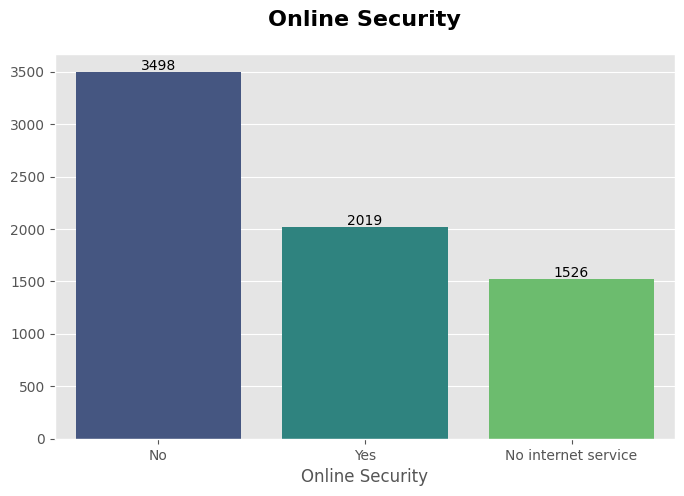

In [26]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Online Security'].value_counts().index, y=data['Online Security'].value_counts().values, palette='viridis')
plt.title('Online Security', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Online Security'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Most of the customers have no online security

<ipython-input-27-f025a71bd9e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Online Backup'].value_counts().index, y=data['Online Backup'].value_counts().values, palette='viridis')


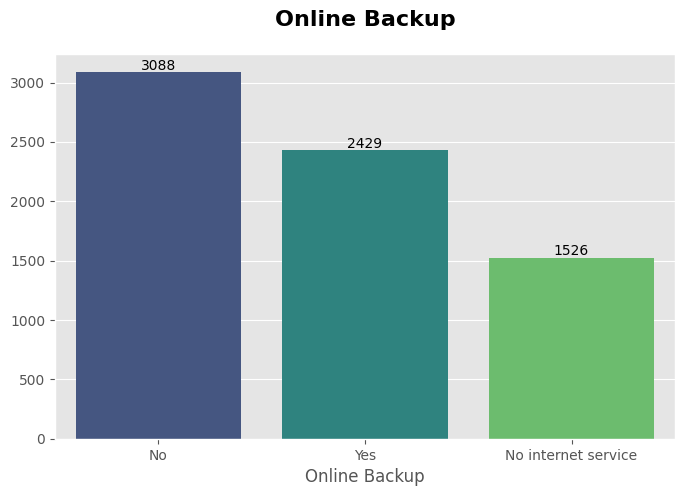

In [27]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Online Backup'].value_counts().index, y=data['Online Backup'].value_counts().values, palette='viridis')
plt.title('Online Backup', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Online Backup'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

<ipython-input-28-5b0246ea5706>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Device Protection'].value_counts().index, y=data['Device Protection'].value_counts().values, palette='viridis')


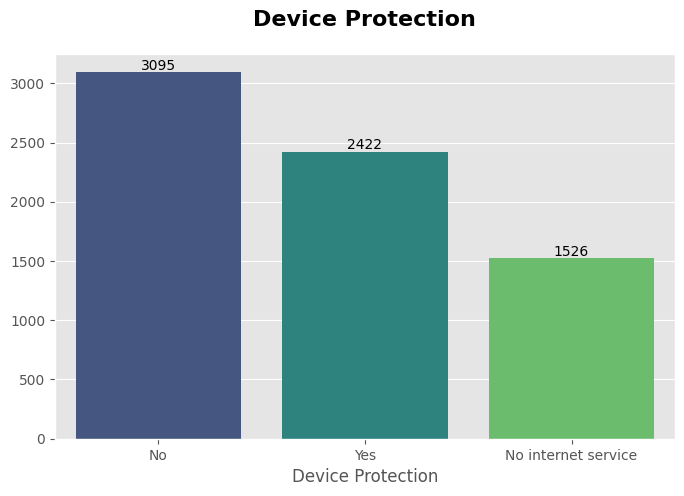

In [28]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Device Protection'].value_counts().index, y=data['Device Protection'].value_counts().values, palette='viridis')
plt.title('Device Protection', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Device Protection'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

<ipython-input-29-23e9ff263132>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Tech Support'].value_counts().index, y=data['Tech Support'].value_counts().values, palette='viridis')


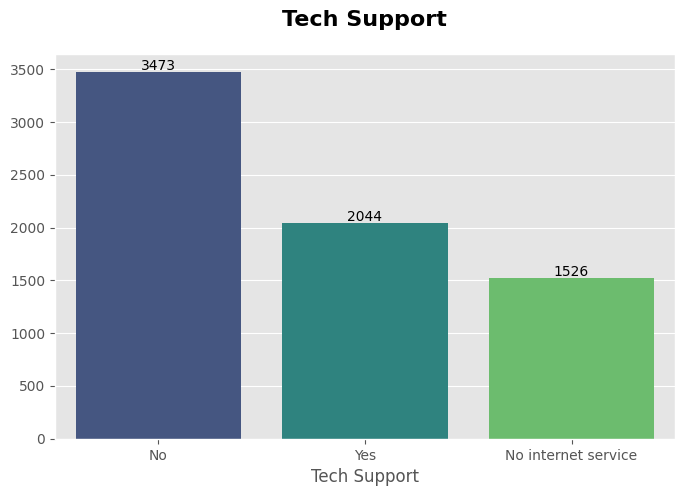

In [29]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Tech Support'].value_counts().index, y=data['Tech Support'].value_counts().values, palette='viridis')
plt.title('Tech Support', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Tech Support'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

<ipython-input-30-a163d764bcef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Streaming TV'].value_counts().index, y=data['Streaming TV'].value_counts().values, palette='viridis')


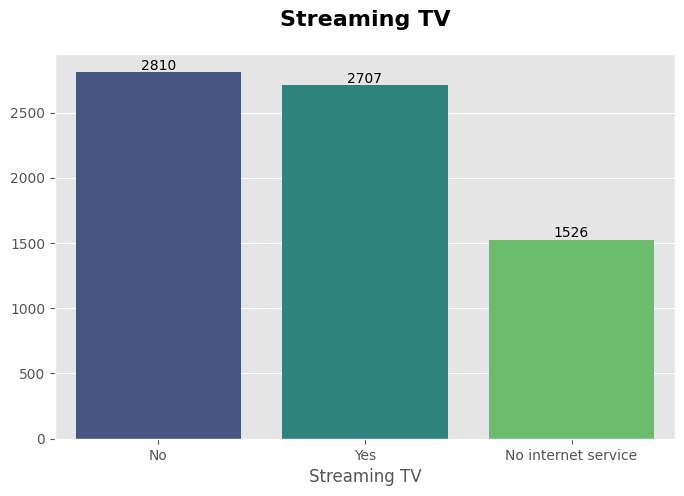

In [30]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Streaming TV'].value_counts().index, y=data['Streaming TV'].value_counts().values, palette='viridis')
plt.title('Streaming TV', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Streaming TV'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Most of the customers have no Streaming TV

<ipython-input-31-9bb02026353c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Streaming Movies'].value_counts().index, y=data['Streaming Movies'].value_counts().values, palette='viridis')


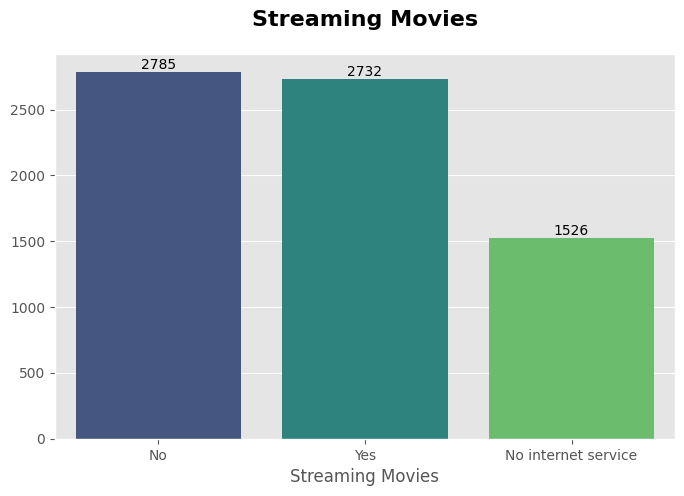

In [31]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Streaming Movies'].value_counts().index, y=data['Streaming Movies'].value_counts().values, palette='viridis')
plt.title('Streaming Movies', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Streaming Movies'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

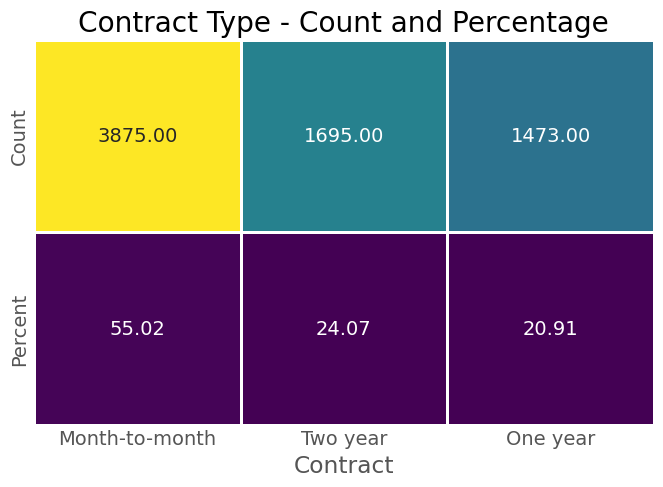

In [32]:
count = data.Contract.value_counts()
per = data.Contract.value_counts(normalize=True)*100
freq_table2 = pd.DataFrame({'Count':count,'Percent':per})
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
sns.heatmap(freq_table2.T, annot=True, cbar=False, fmt='.2f', cmap='viridis', linewidths=1)
plt.title('Contract Type - Count and Percentage')
plt.show()

<ipython-input-33-547bd466a18d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Paperless Billing'].value_counts().index, y=data['Paperless Billing'].value_counts().values, palette='viridis')


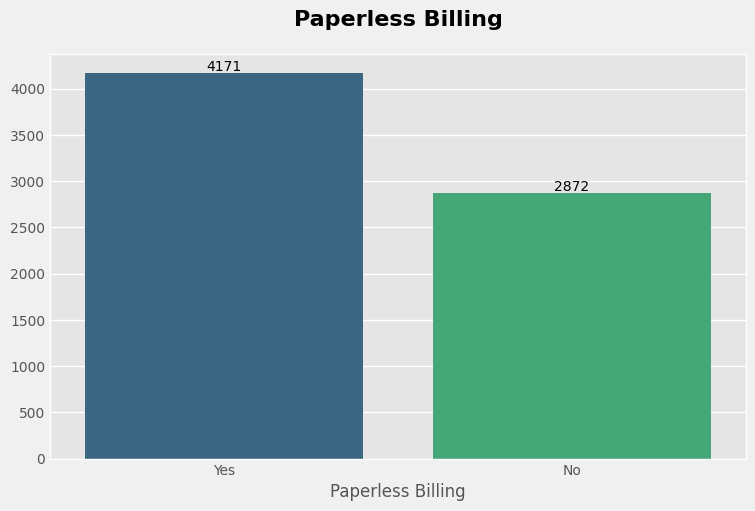

In [33]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Paperless Billing'].value_counts().index, y=data['Paperless Billing'].value_counts().values, palette='viridis')
plt.title('Paperless Billing', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Paperless Billing'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

In [34]:
data['Payment Method'].value_counts()

,count
Payment Method,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


<ipython-input-35-63d43034cdd6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Payment Method'].value_counts().index, y=data['Payment Method'].value_counts().values, palette='viridis')


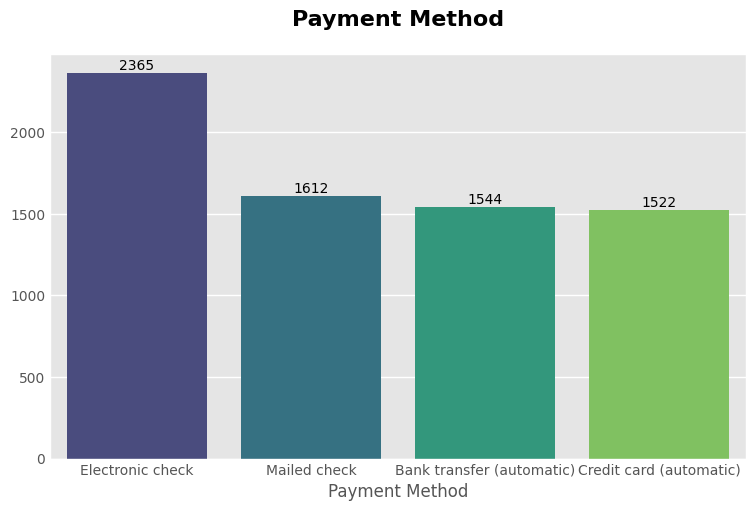

In [35]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Payment Method'].value_counts().index, y=data['Payment Method'].value_counts().values, palette='viridis')
plt.title('Payment Method', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Payment Method'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Most payment method is Electronic Check

In [36]:
data['Monthly Charges'].describe()

,Monthly Charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


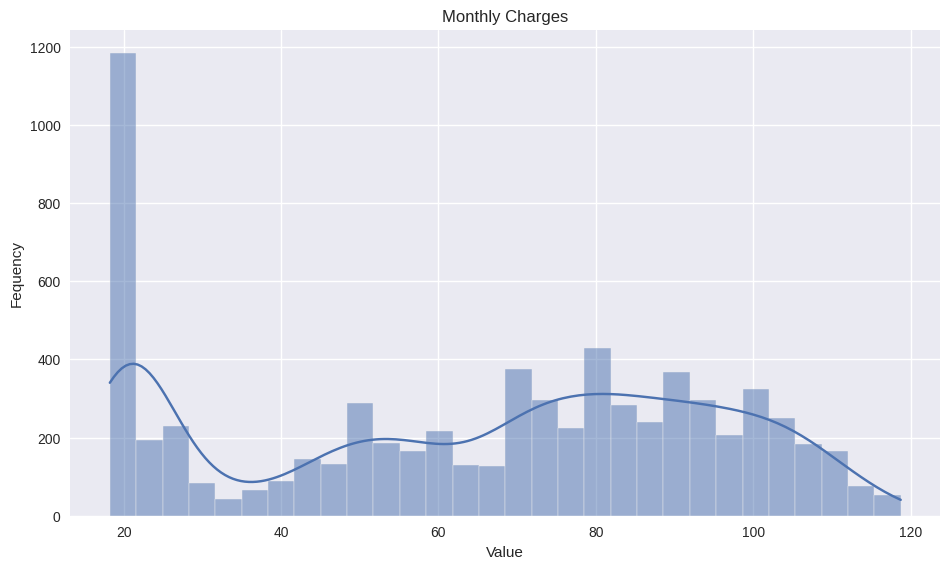

In [37]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')
sns.histplot(data['Monthly Charges'], bins=30, kde=True)
plt.title('Monthly Charges')
plt.xlabel('Value')
plt.ylabel('Fequency')
plt.show()



In [38]:
data['Total Charges'] = data['Total Charges'].replace(" ", 0)
data['Total Charges'] = data['Total Charges'].astype(int)

<ipython-input-38-dc8905ff4a6f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Total Charges'] = data['Total Charges'].replace(" ", 0)


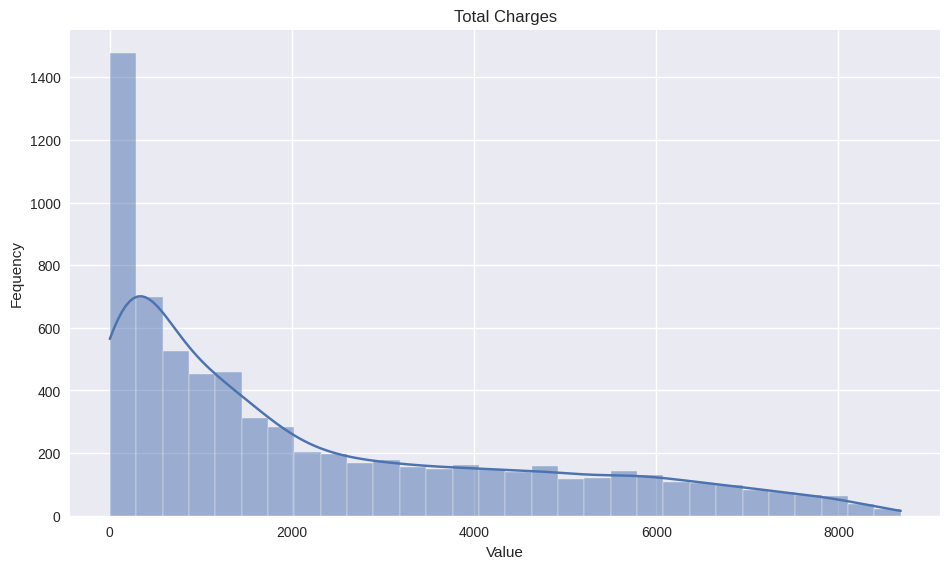

In [39]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')
sns.histplot(data['Total Charges'], bins=30, kde=True)
plt.title('Total Charges')
plt.xlabel('Value')
plt.ylabel('Fequency')
plt.show()

<ipython-input-40-326068a26287>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Churn Label'].value_counts().index, y=data['Churn Label'].value_counts().values, palette='viridis')


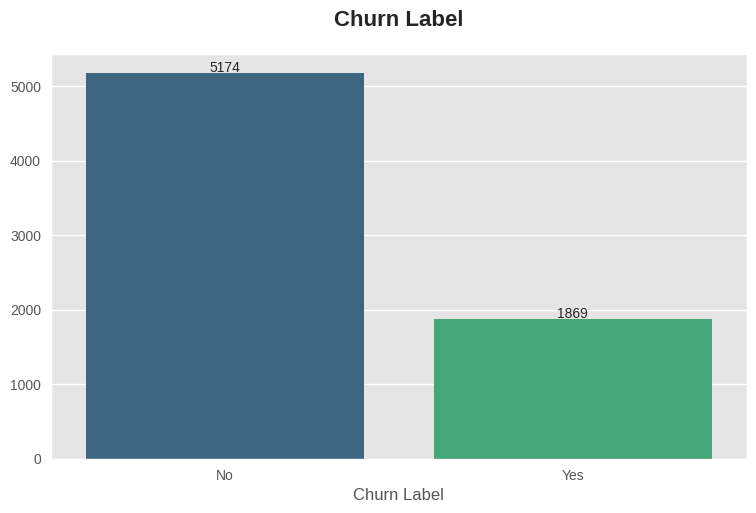

In [40]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x=data['Churn Label'].value_counts().index, y=data['Churn Label'].value_counts().values, palette='viridis')
plt.title('Churn Label', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Churn Label'].value_counts().values):
    plt.text(i, count + 20, str(count), ha='center')
plt.show()

- Most of the customers have not churned

In [41]:
data = data.drop(columns='Churn Label')

In [42]:
data['Churn Score'].describe()

,Churn Score
count,7043.000000
mean,58.699418
std,21.525131
min,5.000000
25%,40.000000
50%,61.000000
75%,75.000000
max,100.000000


<ipython-input-43-5d814f2fb368>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['Churn Reason'].value_counts().index, x=data['Churn Reason'].value_counts().values, palette='viridis')


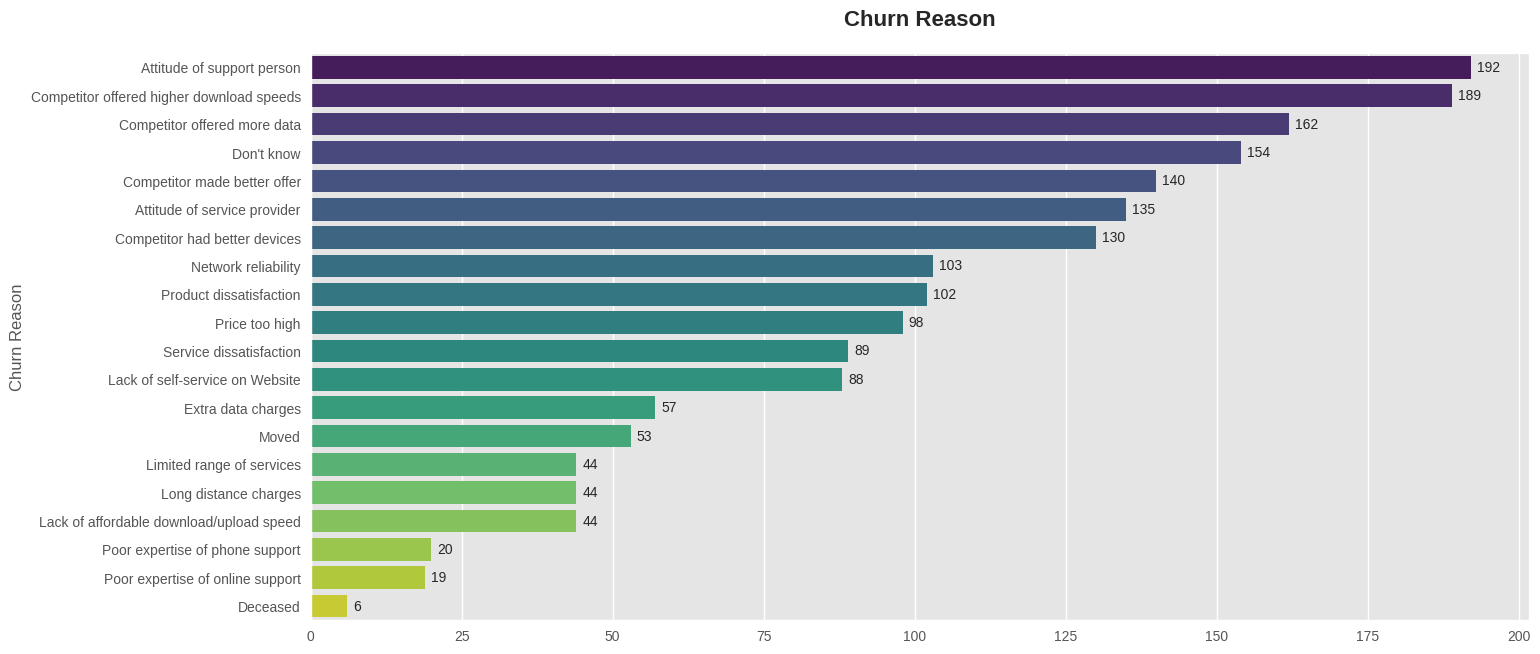

In [43]:
plt.figure(figsize=(14,7))
plt.style.use('ggplot')
sns.barplot(y=data['Churn Reason'].value_counts().index, x=data['Churn Reason'].value_counts().values, palette='viridis')
plt.title('Churn Reason', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(data['Churn Reason'].value_counts().values):
    plt.text(count + 1, i, str(count), va='center')
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Zip Code           7043 non-null   int64  
 3   Lat Long           7043 non-null   object 
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   object 
 12  Multiple Lines     7043 non-null   object 
 13  Internet Service   7043 non-null   object 
 14  Online Security    7043 non-null   object 
 15  Online Backup      7043 non-null   object 
 16  Device Protection  7043 

# Features & Traget Selection

In [45]:
X = data.drop(columns=['CustomerID','Churn Value'])
y = data['Churn Value']

# Data Preprocessing

## Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype in ['O', 'object', 'category']:
        X[col]= encoder.fit_transform(X[col])

## Spliting

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)

# Machine Learning Algorithms

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [52]:

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier(verbose=-1)),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False)),
    ('KNN', KNeighborsClassifier())
]

results = []
for name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy,
    })


results_data = pd.DataFrame(results)
display(results_data)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Score,Test Score,Accuracy Score
0,Logistic Regression,0.918353,0.920511,0.920511
1,Decision Tree,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000
3,AdaBoost Classifier,1.000000,1.000000,1.000000
4,Gradient Boosting Classifier,1.000000,1.000000,1.000000
5,XGBClassifier,1.000000,1.000000,1.000000
6,LGBMClassifier,1.000000,1.000000,1.000000
7,CatBoostClassifier,1.000000,1.000000,1.000000
8,KNN,0.790557,0.689141,0.689141


# Scaling

In [53]:
from keras.utils import to_categorical

In [54]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ANN

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [56]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.20))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=2, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
confusion = confusion_matrix(y_test_classes, y_pred_classes)
score = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Model Score:{score}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7597 - loss: 0.4267
Epoch 2/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9657 - loss: 0.1023
Epoch 3/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9792 - loss: 0.0594
Epoch 4/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - loss: 0.0439
Epoch 5/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9921 - loss: 0.0292
Epoch 6/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9922 - loss: 0.0237
Epoch 7/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9898 - loss: 0.0225
Epoch 8/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0176
Epoch 9/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9922 - loss: 0.0212
Epoch 10/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9934 - loss: 0.0179
Epoch 11/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9957 - loss: 0.0144
Epoch 12/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step